# Pipeline: Step 3 (Data Processing)

## Exercises

> The end product of this exercise should be the specified functions in a python script named prepare.py. 

> Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

> This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

## Q1) Using the Iris Data:

> 1. Use the function defined in acquire.py to load the iris data.

In [1]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import our acquire module

import acquire

In [2]:
df=acquire.get_iris_data()

this file exists, reading csv


In [3]:
df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


> 2.Clean up the column names - replace the period with an underscore and lowercase.

In [4]:
df.shape

(150, 7)

In [5]:
df.columns.nunique()

7

In [6]:
df.columns.unique()

Index(['species_id', 'measurement_id', 'sepal_length', 'sepal_width',
       'petal_length', 'petal_width', 'species_name'],
      dtype='object')

In [7]:
df.columns.str.replace('.','_').str.lower()

Index(['species_id', 'measurement_id', 'sepal_length', 'sepal_width',
       'petal_length', 'petal_width', 'species_name'],
      dtype='object')

> 3.Drop the species_id and measurement_id columns.

In [8]:
df=df.drop(columns=['species_id','measurement_id'])

In [9]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


> 4.Rename the species_name column to just species.

In [10]:
df=df.rename(columns={'species_name':'species'})

In [11]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


> 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [12]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import our acquire module
import acquire

In [13]:
def prep_iris(df):
    """
    this function will clean the iris Data whether it acquired from
    sql database or cvs file from your local drive of the machine.
    
    """
    # Clean up the column names - replace the period 
    # with an underscore and lowercase.


    df.columns=df.columns.str.replace('.','_').str.lower()
    
    # Drop the species_id and measurement_id columns.
    df=df.drop(columns=['species_id','measurement_id'])
    
    # Rename the species_name column to just species.
    df=df.rename(columns={'species_name':'species'})
    
    return df  
    

###  Testing that the function does what we intend for it to do.

In [14]:
fresh_iris_df = acquire.get_iris_data()

this file exists, reading csv


In [15]:
fresh_iris_df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [16]:
prep_iris(fresh_iris_df)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Q2) Using the Titanic dataset

> 1.Use the function defined in acquire.py to load the Titanic data.



In [17]:
df=acquire.get_titanic_data()

this file exists, reading csv


In [18]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


> 2.Drop any unnecessary, unhelpful, or duplicated columns.



In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [20]:
# describe all
df.describe(include='all')

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
count,891.000000,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,203,889,891.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,7,3,NaN
top,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,C,Southampton,NaN
freq,NaN,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,59,644,NaN
mean,445.000000,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,0.602694
std,257.353842,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,0.489615
min,0.000000,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,222.500000,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,0.000000
50%,445.000000,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,1.000000
75%,667.500000,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,1.000000


### Let's compare 'pclass' with 'class'

In [21]:
df.pclass.value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [22]:
df['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [23]:
pd.crosstab(df.pclass,df['class'])

class,First,Second,Third
pclass,,,
1,216,0,0
2,0,184,0
3,0,0,491


In [24]:
# by crosstab, we conclude that both column carries similar meaning info
#  so i am going to drop "class" column, which is unnecessary column.
df=df.drop(columns='class')

In [25]:
df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,NaN,Southampton,1


### Let's compare 'embarked' with 'embark_town' columns

In [26]:
df.embarked.value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [27]:
df.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [28]:
pd.crosstab(df.embarked,df.embark_town)

embark_town,Cherbourg,Queenstown,Southampton
embarked,,,
C,168,0,0
Q,0,77,0
S,0,0,644


In [29]:
# drop the unnecessary column
df=df.drop(columns='embarked')

In [30]:
df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,NaN,Southampton,1


In [31]:
# verify Datatypes
df.dtypes

passenger_id      int64
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
deck             object
embark_town      object
alone             int64
dtype: object

In [32]:
##changing to a string variable because we want to treat it like a category, not a numeric value
df.pclass=df.pclass.astype('object')


In [33]:
df.dtypes

passenger_id      int64
survived          int64
pclass           object
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
deck             object
embark_town      object
alone             int64
dtype: object

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    object 
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   deck          203 non-null    object 
 9   embark_town   889 non-null    object 
 10  alone         891 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


In [35]:
df.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [36]:
df.deck

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: object

### above info shows that 'age', 'deck', and 'embark_town' have Null values (or NaN ).
NaN stands for 'not a number' and it's technically a float.

### Handle Nulls

some options:-

- delete all nulls rows

- delete that column

- fill with a median value (numeric columns)

- fill with the mode (string columns)

- fill with with 0


### age

In [37]:
df.age.isnull().sum()

177

In [38]:
df.age.value_counts()

age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [39]:
df.age.mean()

29.69911764705882

<Axes: >

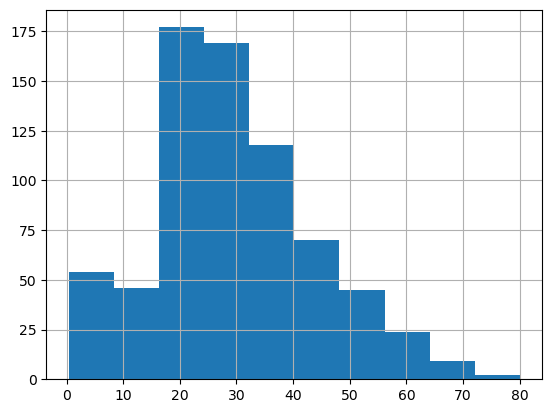

In [40]:
df.age.hist()

In [41]:
# to check % of null values
df.age.isnull().mean()

0.19865319865319866

We dropped the age column, since 20% of the values were null and I wasnt happy with the mean since there was a wide distribution of ages

With more time, I'd like to revisit this column to fill the null values

Maybe try comparing mean ages by class to see if there a relationship

In [42]:
df=df.drop(columns='age')

In [43]:
# verify
df.head(3)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,deck,embark_town,alone
0,0,0,3,male,1,0,7.2500,NaN,Southampton,0
1,1,1,1,female,1,0,71.2833,C,Cherbourg,0
2,2,1,3,female,0,0,7.9250,NaN,Southampton,1


### deck

In [44]:
df.shape

(891, 10)

In [45]:
df.deck.isnull().sum()

688

In [46]:
df.deck.isnull().mean()

0.7721661054994389

In [47]:
688/891

0.7721661054994389

> since there are so many ( about more than 77%) are nulls in this column, so we will delete the column.  

In [48]:
df=df.drop(columns='deck')

In [49]:
# verify
df.head(3)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    object 
 3   sex           891 non-null    object 
 4   sibsp         891 non-null    int64  
 5   parch         891 non-null    int64  
 6   fare          891 non-null    float64
 7   embark_town   889 non-null    object 
 8   alone         891 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 69.6+ KB


Since info shows 'embark_town' has 2 null values

In [51]:
df.embark_town.isnull().sum()

2

In [52]:
df.embark_town.isnull().mean()*100


0.22446689113355783

In [53]:
df.embark_town.value_counts()


embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

> there is a clear most popular value (southampton) and there are only two missing rows

> the best two options are deleting the rows completely or filling with the mode

In [54]:
 df.shape

(891, 9)

In [55]:
# fill 
df.embark_town= df.embark_town.fillna('Southampton')

In [56]:
df.embark_town.value_counts()

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

### Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [57]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import our acquire module
import acquire

In [58]:
def prep_titanic(df):
    """
    This is a function that accepts the acquired titanic data, and returns the data with the transformations
    by cleaning data.
    
    """
    #drop unncessary columns
    df = df.drop(columns=['embarked', 'age','deck', 'class'])
    
    #made this a string so its categorical
    df.pclass = df.pclass.astype(object)
    
    #filled NaN with the mode
    df.embark_town = df.embark_town.fillna('Southampton')
    
    return df

In [59]:
# testing that above defined function
fresh_titanic_df=acquire.get_titanic_data()

this file exists, reading csv


In [60]:
fresh_titanic_df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1


In [61]:
prep_titanic(fresh_titanic_df)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,Southampton,1
887,887,1,1,female,0,0,30.0000,Southampton,1
888,888,0,3,female,1,2,23.4500,Southampton,0
889,889,1,1,male,0,0,30.0000,Cherbourg,1


## Q3) Using the Telco dataset

> 1. Use the function defined in acquire.py to load the Telco data.



In [62]:
df=acquire.get_telco_data()


this file exists, reading csv


In [63]:
df.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


In [64]:
df.shape

(7043, 24)

> 2.Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_support 

In [66]:
df=df.drop(columns=['payment_type_id','internet_service_type_id','contract_type_id'])


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  monthly_c

> 3. Handle null values.

In [68]:
# here in the 'total_charges' is object(string) data type. 
# so before we calculating further, we must have to convert into float. 
df.total_charges.value_counts()


total_charges
           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: count, Length: 6531, dtype: int64

In [69]:
# here in the 'total_charges' there are 11 records empty (not it is nan) and it is object(string) data type. 
# so before we calculating further, we must have to convert into float and
# doing something on the single space data also.

# 1st option is to completely remove them from the dataset
# df=df[df.total_charges !=' ']
# df.total_charges=df.total_charges.astype(float)

# 2nd option is called "stringrization" or "string accessor" or "string operations" 
df.total_charges=df.total_charges.str.replace(' ','0.0').astype(float)

In [70]:
df.total_charges.value_counts()


total_charges
0.00       11
20.20      11
19.75       9
19.90       8
20.05       8
           ..
2387.75     1
6302.80     1
2058.50     1
829.55      1
3707.60     1
Name: count, Length: 6531, dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  monthly_c

In [72]:
df.isnull()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [73]:
# find where null values are
df.isnull().nunique()

customer_id              1
gender                   1
senior_citizen           1
partner                  1
dependents               1
tenure                   1
phone_service            1
multiple_lines           1
online_security          1
online_backup            1
device_protection        1
tech_support             1
streaming_tv             1
streaming_movies         1
paperless_billing        1
monthly_charges          1
total_charges            1
churn                    1
contract_type            1
internet_service_type    2
payment_type             1
dtype: int64

In [74]:
df.isnull().sum()

customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type    1526
payment_type                0
dtype: int64

In [75]:
df.isnull().sum()>0

customer_id              False
gender                   False
senior_citizen           False
partner                  False
dependents               False
tenure                   False
phone_service            False
multiple_lines           False
online_security          False
online_backup            False
device_protection        False
tech_support             False
streaming_tv             False
streaming_movies         False
paperless_billing        False
monthly_charges          False
total_charges            False
churn                    False
contract_type            False
internet_service_type     True
payment_type             False
dtype: bool

In [76]:
df.isnull().sum()[df.isnull().sum()>0]

internet_service_type    1526
dtype: int64

There are non null values.So we dont have to do anything.

> 4.Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [77]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import our acquire module
import acquire

In [78]:
def prep_telco(df):
    '''
    function named prep_telco that accepts the raw telco data, 
    and returns the data with the transformations.

    '''
    df = df.drop(columns = ['payment_type_id','internet_service_type_id','contract_type_id'])
    df.total_charges = df.total_charges.str.replace(' ', '0.0')
    
    return df


> testing the "prep_telco()" function.

In [79]:
fresh_telco_df=acquire.get_telco_data()

this file exists, reading csv


In [80]:
fresh_telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [81]:
fresh_telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_support 

In [82]:
fresh_telco_df.total_charges.value_counts()

total_charges
           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: count, Length: 6531, dtype: int64

In [83]:
fresh_telco_df=prep_telco(fresh_telco_df)

In [84]:
fresh_telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  monthly_c

In [85]:
fresh_telco_df.total_charges.value_counts()

total_charges
0.0        11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: count, Length: 6531, dtype: int64

# Q4) Split your data

> 1.Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

In [86]:
# this is the only for the testing the prepare python module

import prepare

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
#first split
def splitting_data(df,target):

            # 1st split
            #this is return two dataframes
            train,validate_test=train_test_split(df, #send in initial df
                 train_size=0.60, #size of the train df, and the test size will default to 1-train_size
                random_state=123, #set any number here for consistency
                 stratify=df[target] #need to stratify on target variable
                ) 
            
            
            
            # 2nd split
            validate,test=train_test_split(validate_test,
                                           train_size=0.5,
                                           random_state=123,
                                           stratify=validate_test[target]
                                          )
            
            
            return train, validate, test
                                          

> 2.Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris


In [89]:
iris_df=acquire.get_iris_data()

this file exists, reading csv


In [90]:
iris_df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [91]:
iris_df=prep_iris(iris_df)

In [92]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [93]:
train_iris, validate_iris, test_iris = splitting_data(iris_df, 'species')

In [94]:

print(f'shape of iris_df: {iris_df.shape}')
print('-----------------------------')
print(f'shape of train_iris: {train_iris.shape}')
print(f'shape of validate_iris: {validate_iris.shape}')
print(f'shape of test_iris: {test_iris.shape}')

shape of iris_df: (150, 5)
-----------------------------
shape of train_iris: (90, 5)
shape of validate_iris: (30, 5)
shape of test_iris: (30, 5)


> 3.Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

In [95]:
titanic_df=acquire.get_titanic_data()

this file exists, reading csv


In [96]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [97]:
titanic_df=prep_titanic(titanic_df)

In [98]:
titanic_df.head(3)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1


In [99]:
train_titanic,validate_titanic,test_titanic=splitting_data(titanic_df,'survived')

In [100]:
print(f'shape of iris_df: {titanic_df.shape}')
print('-----------------------------')
print(f'shape of train_iris: {train_titanic.shape}')
print(f'shape of validate_iris: {validate_titanic.shape}')
print(f'shape of test_iris: {test_titanic.shape}')

shape of iris_df: (891, 9)
-----------------------------
shape of train_iris: (534, 9)
shape of validate_iris: (178, 9)
shape of test_iris: (179, 9)


> 4.Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [101]:
telco_df=acquire.get_telco_data()

this file exists, reading csv


In [102]:
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [103]:
telco_df=prep_telco(telco_df)

In [104]:
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [105]:
train_telco, validate_telco, test_telco = splitting_data(telco_df, 'churn')

In [106]:
print(f'shape of iris_df: {telco_df.shape}')
print('-----------------------------')
print(f'shape of train_iris: {train_telco.shape}')
print(f'shape of validate_iris: {validate_telco.shape}')
print(f'shape of test_iris: {test_telco.shape}')

shape of iris_df: (7043, 21)
-----------------------------
shape of train_iris: (4225, 21)
shape of validate_iris: (1409, 21)
shape of test_iris: (1409, 21)
